In [1]:
import logomaker
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [18]:
START, END = 11_089_299, 11_089_425
PLOT_DIR = "../../results/plots/nuc_dep/"
os.makedirs(PLOT_DIR, exist_ok=True)

In [3]:
mpra = pd.read_parquet("hf://datasets/gonzalobenegas/sat_mut_mpra/test.parquet").query(
    'element == "LDLR"'
)
mpra = mpra[mpra.pos.between(START, END, inclusive="left")]
mpra

,chrom,pos,ref,alt,label,element
3349,19,11089299,G,A,0.137432,LDLR
3350,19,11089300,A,C,-0.354230,LDLR
3351,19,11089301,G,C,0.293726,LDLR
3352,19,11089306,A,C,-0.333681,LDLR
3353,19,11089306,A,G,-0.335901,LDLR
...,...,...,...,...,...,...
3620,19,11089421,A,G,0.504210,LDLR
3621,19,11089422,G,A,-0.256129,LDLR
3622,19,11089423,A,T,0.188121,LDLR
3623,19,11089424,A,G,0.174942,LDLR


In [4]:
mpra["effect_size"] = mpra.label.abs()
mpra = mpra.groupby("pos").effect_size.mean()

In [5]:
# For missing positions, fill with zero
mpra = mpra.reindex(range(START, END), fill_value=0).reset_index()
mpra

,pos,effect_size
0,11089299,0.137432
1,11089300,0.354230
2,11089301,0.293726
3,11089302,0.000000
4,11089303,0.000000
...,...,...
121,11089420,0.189282
122,11089421,0.504210
123,11089422,0.256129
124,11089423,0.188121


In [6]:
mpra.effect_size = mpra.effect_size.rolling(window=5, center=True, min_periods=1).mean()
mpra

,pos,effect_size
0,11089299,0.261796
1,11089300,0.196347
2,11089301,0.157077
3,11089302,0.129591
4,11089303,0.058745
...,...,...
121,11089420,0.469400
122,11089421,0.227549
123,11089422,0.260889
124,11089423,0.278791


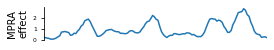

In [26]:
plt.figure(figsize=(4, 0.6))
sns.lineplot(
    data=mpra,
    x="pos",
    y="effect_size",
)
sns.despine(bottom=True)
plt.xlabel("")
plt.ylabel("MPRA\neffect")
plt.xticks([])
plt.yticks([0, 1, 2], fontsize=6)
plt.xlim(START, END - 1)
plt.ylim(0)
plt.savefig(PLOT_DIR + "LDLR_MPRA.svg", bbox_inches="tight")